In [6]:
from myCnn.cnnWithAttention.utils import *
from myCnn.cnnWithAttention.attentionStructure import *
from myCnn.cnnWithAttention.train_my_cnn import *
import matplotlib.pyplot as plt

ROOT_DIR = "emnist_png_balanced"  # 数据集路径
BATCH_SIZE = 256  # 批大小
EPOCH = 500  # 训练轮数
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")# 设备选择
LR = 1e-4  # 学习率

transform = AlbumentationsTransform()  # 使用数据增强

train_loader, val_loader, test_loader1, full_dataset = split_dataset(
    root_dir=ROOT_DIR,
    transform=transform,
    train_ratio=0.7,
    val_ratio=0.15,
    test_ratio=0.15,
    batch_size=BATCH_SIZE,
    shuffle=True,
    random_seed=42
)

# 打印数据集大小
print(f"训练集大小: {len(train_loader.dataset)}")
print(f"验证集大小: {len(val_loader.dataset)}")
print(f"测试集大小: {len(test_loader1.dataset)}")

# 获取类别数量
label_num = len(full_dataset.class_to_idx)


CNNWithAttention = CNNModel(label_num, use_attention=True) # 调用模型
CNNnoAttention = CNNModel(label_num, use_attention=False)

transform = AlbumentationsTransformBase()  # 不使用数据增强


train_loader, val_loader, test_loader2, full_dataset = split_dataset(
    root_dir=ROOT_DIR,
    transform=transform,
    train_ratio=0.7,
    val_ratio=0.15,
    test_ratio=0.15,
    batch_size=BATCH_SIZE,
    shuffle=True,
    random_seed=42,
)

# 打印数据集大小
print(f"训练集大小: {len(train_loader.dataset)}")
print(f"验证集大小: {len(val_loader.dataset)}")
print(f"测试集大小: {len(test_loader2.dataset)}")

# 获取类别数量
label_num = len(full_dataset.class_to_idx)


CNNWithAttention_noBoost = CNNModel(label_num, use_attention=True) # 调用模型

CNNWithAttention.load_state_dict(torch.load('myCnn/save/cnn_res_attention_aug_best.pth'))
CNNnoAttention.load_state_dict(torch.load('myCnn/save/cnn_res_noattention_aug_best.pth'))
CNNWithAttention_noBoost.load_state_dict(torch.load('myCnn/save/cnn_res_attention_noaug_best.pth'))

CNNWithAttention.to(device)
CNNnoAttention.to(device)
CNNWithAttention_noBoost.to(device)

# 模型大小
model_size_CNNwithAttention = sum(p.numel() for p in CNNWithAttention.parameters())
model_size_CNNnoAttention = sum(p.numel() for p in CNNnoAttention.parameters())
model_size_CNNWithAttention_noBoost = sum(p.numel() for p in CNNWithAttention_noBoost.parameters())
# 打印模型大小
print(f"CNNWithAttention: {model_size_CNNwithAttention}")
print(f"CNNnoAttention: {model_size_CNNnoAttention}")
print(f"CNNWithAttention_noBoost: {model_size_CNNWithAttention_noBoost}")

训练集每个类别样本数：
类别 A: 700
类别 B: 700
类别 C: 700
类别 D: 700
类别 E: 700
类别 F: 700
类别 G: 700
类别 H: 700
类别 I: 700
类别 J: 700
类别 K: 700
类别 L: 700
类别 M: 700
类别 N: 700
类别 O: 700
类别 P: 700
类别 Q: 700
类别 R: 700
类别 S: 700
类别 T: 700
类别 U: 700
类别 V: 700
类别 W: 700
类别 X: 700
类别 Y: 700
类别 Z: 700
类别 a_: 700
类别 b_: 700
类别 d_: 700
类别 e_: 700
类别 f_: 700
类别 g_: 700
类别 h_: 700
类别 n_: 700
类别 q_: 700
类别 r_: 700
类别 t_: 700

验证集每个类别样本数：
类别 A: 150
类别 B: 150
类别 C: 150
类别 D: 150
类别 E: 150
类别 F: 150
类别 G: 150
类别 H: 150
类别 I: 150
类别 J: 150
类别 K: 150
类别 L: 150
类别 M: 150
类别 N: 150
类别 O: 150
类别 P: 150
类别 Q: 150
类别 R: 150
类别 S: 150
类别 T: 150
类别 U: 150
类别 V: 150
类别 W: 150
类别 X: 150
类别 Y: 150
类别 Z: 150
类别 a_: 150
类别 b_: 150
类别 d_: 150
类别 e_: 150
类别 f_: 150
类别 g_: 150
类别 h_: 150
类别 n_: 150
类别 q_: 150
类别 r_: 150
类别 t_: 150

测试集每个类别样本数：
类别 A: 150
类别 B: 150
类别 C: 150
类别 D: 150
类别 E: 150
类别 F: 150
类别 G: 150
类别 H: 150
类别 I: 150
类别 J: 150
类别 K: 150
类别 L: 150
类别 M: 150
类别 N: 150
类别 O: 150
类别 P: 150
类别 Q: 150
类别 R: 150
类别 S: 150
类别 T: 150


In [7]:
model_sizes = [model_size_CNNwithAttention, model_size_CNNnoAttention, model_size_CNNWithAttention_noBoost]
model_names = ["CNNWithAttention", "CNNnoAttention", "CNNWithAttention_noBoost"]
top1_accs = []
top3_accs = []
f1s = []
precisions = []
recalls = []
inference_speeds = []
fps_values = []

In [1]:
from myCnn.evaluate_model import evaluate_model

Confusion matrix, without normalization


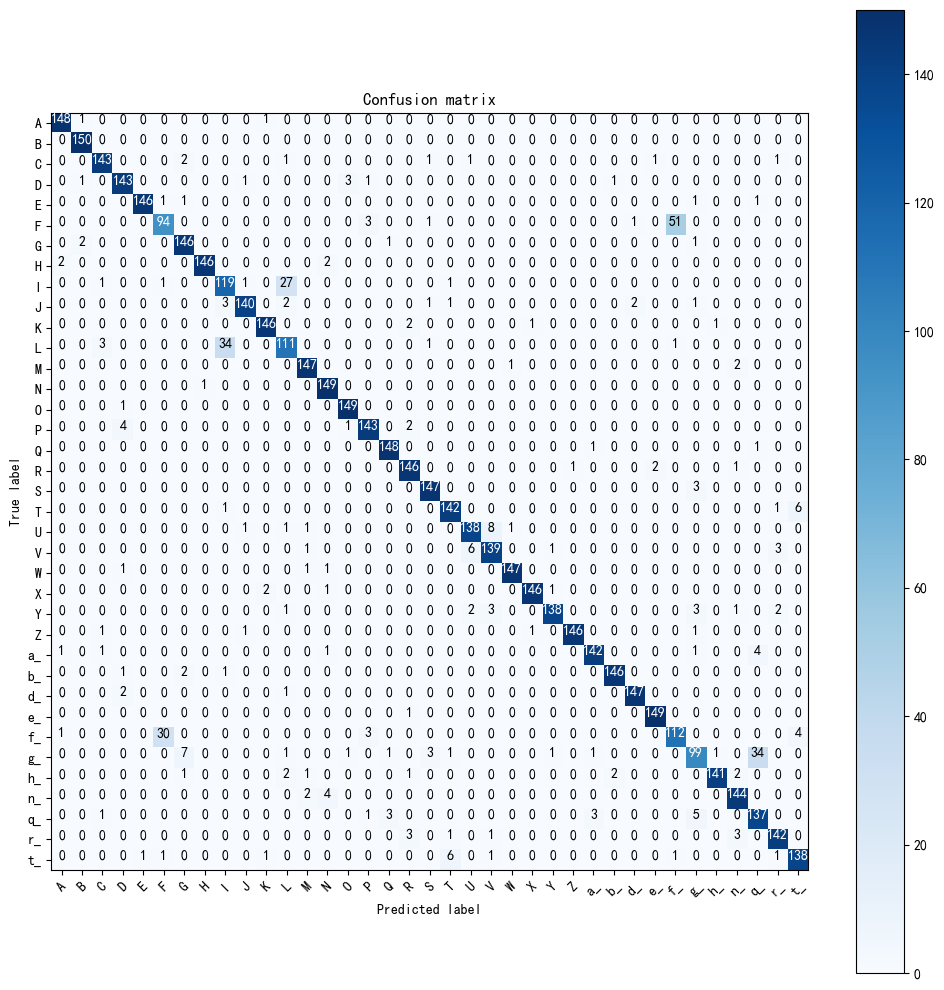

CNNWithAttention Evaluation:
Top-1 Accuracy: 92.8649
Top-3 Accuracy: 99.2613
F1 Score: 0.9281
Precision: 0.9292
Recall: 0.9286
Inference Speed: 0.0043 ms per sample


In [9]:
# 推理
top1_acc_CNNWithAttention, top3_acc_CNNWithAttention, f1_CNNWithAttention, precision_CNNWithAttention, recall_CNNWithAttention, inference_speed_CNNWithAttention = evaluate_model(
    CNNWithAttention, test_loader1, device)

top1_accs.append(top1_acc_CNNWithAttention)
top3_accs.append(top3_acc_CNNWithAttention)
f1s.append(f1_CNNWithAttention)
inference_speeds.append(inference_speed_CNNWithAttention)
fps_values.append(1/inference_speed_CNNWithAttention)

print("CNNWithAttention Evaluation:")
print(f"Top-1 Accuracy: {top1_acc_CNNWithAttention:.4f}")
print(f"Top-3 Accuracy: {top3_acc_CNNWithAttention:.4f}")
print(f"F1 Score: {f1_CNNWithAttention:.4f}")
print(f"Precision: {precision_CNNWithAttention:.4f}")
print(f"Recall: {recall_CNNWithAttention:.4f}")
print(f"Inference Speed: {inference_speed_CNNWithAttention * 1000:.4f} ms per sample")

Confusion matrix, without normalization


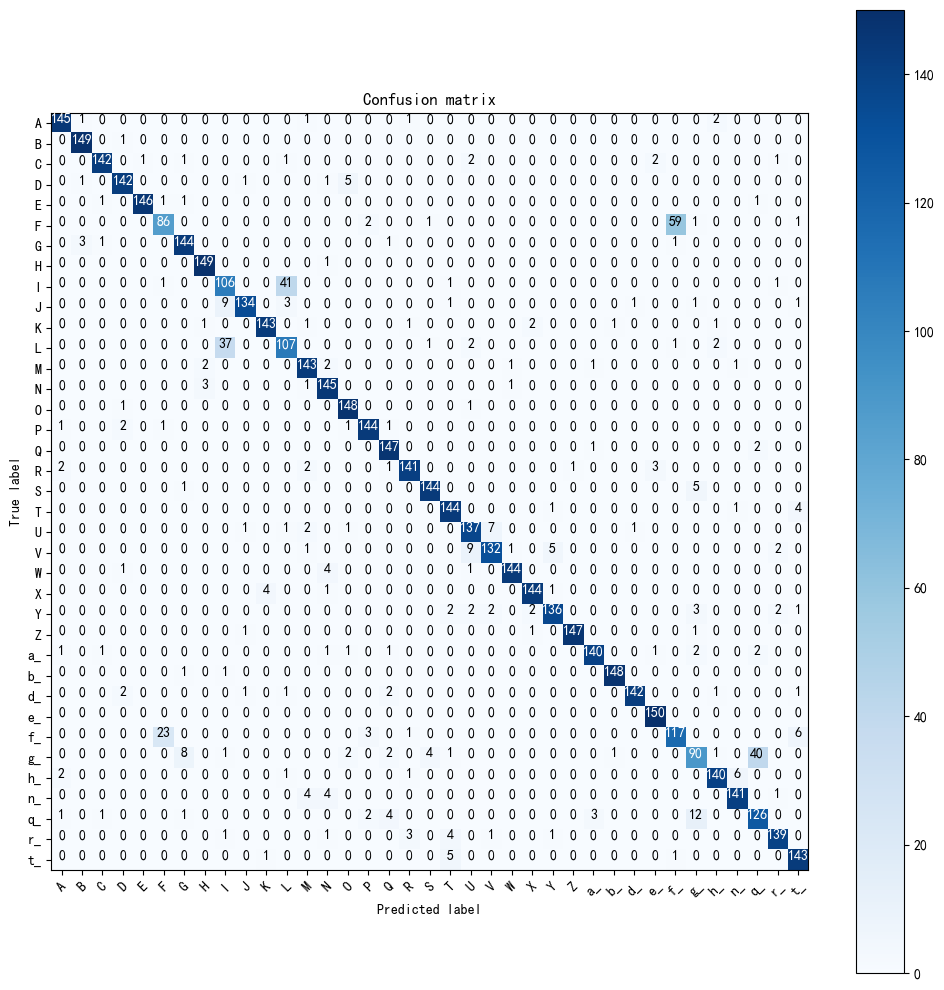

CNNnoAttention Evaluation:
Top-1 Accuracy: 91.2613
Top-3 Accuracy: 98.8288
F1 Score: 0.9119
Precision: 0.9136
Recall: 0.9126
Inference Speed: 0.0030 ms per sample


In [10]:
top1_acc_CNNnoAttention, top3_acc_CNNnoAttention, f1_CNNnoAttention, precision_CNNnoAttention, recall_CNNnoAttention,  inference_speed_CNNnoAttention = evaluate_model(
    CNNnoAttention, test_loader1, device)

top1_accs.append(top1_acc_CNNnoAttention)
top3_accs.append(top3_acc_CNNnoAttention)
f1s.append(f1_CNNnoAttention)
inference_speeds.append(inference_speed_CNNnoAttention)
fps_values.append(1/inference_speed_CNNnoAttention)

print("CNNnoAttention Evaluation:")
print(f"Top-1 Accuracy: {top1_acc_CNNnoAttention:.4f}")
print(f"Top-3 Accuracy: {top3_acc_CNNnoAttention:.4f}")
print(f"F1 Score: {f1_CNNnoAttention:.4f}")
print(f"Precision: {precision_CNNnoAttention:.4f}")
print(f"Recall: {recall_CNNnoAttention:.4f}")
print(f"Inference Speed: {inference_speed_CNNnoAttention * 1000:.4f} ms per sample")

Confusion matrix, without normalization


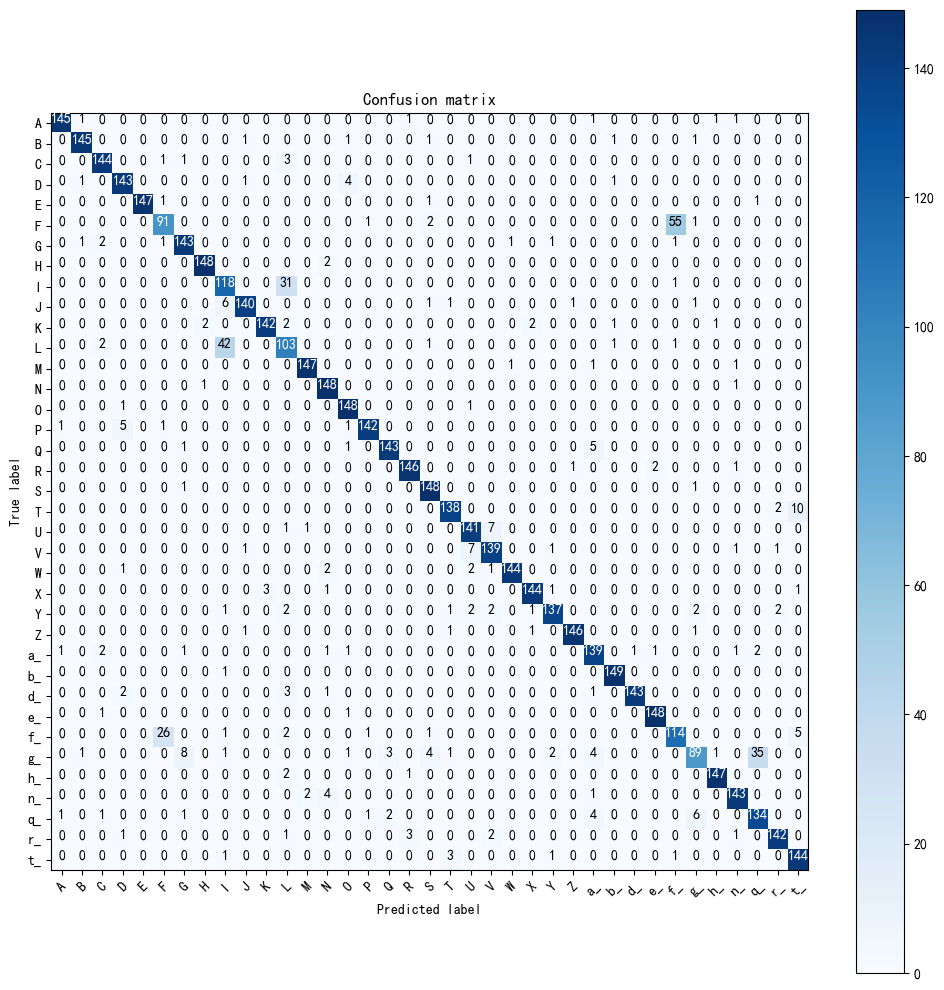

CNNWithAttention_noBoost Evaluation:
Top-1 Accuracy: 92.1081
Top-3 Accuracy: 98.9009
F1 Score: 0.9205
Precision: 0.9228
Recall: 0.9211
Inference Speed: 0.0038 ms per sample


In [11]:
top1_acc_CNNWithAttention_noBoost, top3_acc_CNNWithAttention_noBoost, f1_CNNWithAttention_noBoost, precision_CNNWithAttention_noBoost, recall_CNNWithAttention_noBoost, inference_speed_CNNWithAttention_noBoost = evaluate_model(CNNWithAttention_noBoost, test_loader2, device)

top1_accs.append(top1_acc_CNNWithAttention_noBoost)
top3_accs.append(top3_acc_CNNWithAttention_noBoost)
f1s.append(f1_CNNWithAttention_noBoost)
inference_speeds.append(inference_speed_CNNWithAttention_noBoost)
fps_values.append(1/inference_speed_CNNWithAttention_noBoost)

print("CNNWithAttention_noBoost Evaluation:")
print(f"Top-1 Accuracy: {top1_acc_CNNWithAttention_noBoost:.4f}")
print(f"Top-3 Accuracy: {top3_acc_CNNWithAttention_noBoost:.4f}")
print(f"F1 Score: {f1_CNNWithAttention_noBoost:.4f}")
print(f"Precision: {precision_CNNWithAttention_noBoost:.4f}")
print(f"Recall: {recall_CNNWithAttention_noBoost:.4f}")
print(f"Inference Speed: {inference_speed_CNNWithAttention_noBoost * 1000:.4f} ms per sample")